PArth Joshi, Sir BPTI Bhavnagar

italicized text## Import Libraries

*   numpy
*   matplotlib.pyplot
*   pandas



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Data Set

*   car_evaluation.csv
*   see the given dataset



In [2]:
data=pd.read_csv('Diabetespred.csv')
data.head()
data.info()
#data.shape()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


## data analysis

*   See the number of rows and column
*   Need to change the column names-- rename them
*   See the dataset after adding new column names
*   In each column/features, see the distribution of every catorical values



In [5]:
# Data Analysis Section

# Check the number of rows and columns
print("=== DATASET DIMENSIONS ===")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

print("\n=== DATASET DESCRIPTION ===")
print(data.describe(include='all'))

=== DATASET DIMENSIONS ===
Number of rows: 499
Number of columns: 9

=== DATASET DESCRIPTION ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   499.000000  499.000000     499.000000      499.00000  499.000000   
mean      3.803607  121.354709      68.743487       20.57515   80.390782   
std       3.345786   32.441489      19.452608       15.72019  119.774561   
min       0.000000    0.000000       0.000000        0.00000    0.000000   
25%       1.000000  100.000000      64.000000        0.00000    0.000000   
50%       3.000000  117.000000      70.000000       23.00000   36.000000   
75%       6.000000  142.000000      80.000000       33.00000  122.000000   
max      17.000000  197.000000     122.000000       63.00000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  499.000000                499.000000  499.000000  499.000000  
mean    31.984569                  0.485377   33.086172    0.364729  
std     

### Checking missing values

In [6]:
# Check for missing values in the dataset
print("=== MISSING VALUES ANALYSIS ===")

# Check for null values
missing_values = data.isnull().sum()
print("Null values per column:")
print(missing_values)

# Check for empty strings
empty_strings = (data == '').sum()
print("\nEmpty strings per column:")
print(empty_strings)

# Check for whitespace-only values
whitespace_only = data.apply(lambda x: x.astype(str).str.strip().eq('').sum())
print("\nWhitespace-only values per column:")
print(whitespace_only)

# Total missing data
total_missing = missing_values.sum() + empty_strings.sum() + whitespace_only.sum()
print(f"\nTotal missing values in dataset: {total_missing}")

if total_missing == 0:
    print("✅ Great! No missing values found in the dataset.")
else:
    print("⚠️ Missing values detected and need to be handled.")

=== MISSING VALUES ANALYSIS ===
Null values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Empty strings per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Whitespace-only values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values in dataset

# Visualize data ( first two features only)

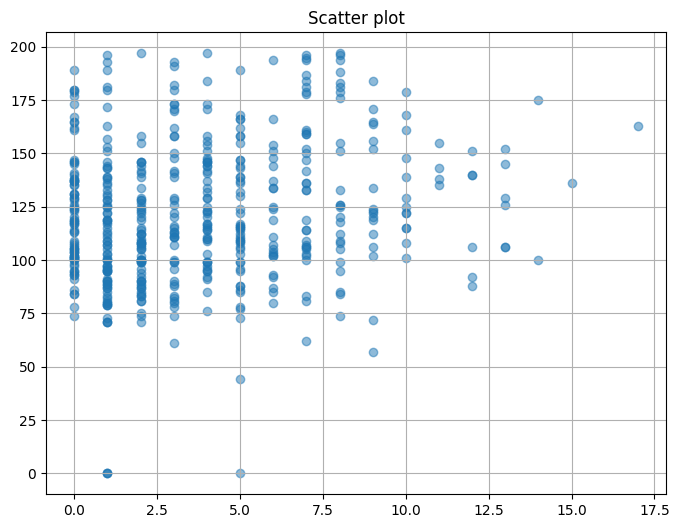

In [15]:
# Visualize the first two features (Pregnancies and Glucose)
plt.figure(figsize=(8, 6))
plt.scatter(data['Pregnancies'], data['Glucose'], alpha=0.5)
plt.title('Scatter plot')
#plt.xlabel('Pregnancies')
#plt.ylabel('Glucose')
plt.grid(True)
plt.show()

## Seperate dependent and independent variables

In [10]:
# Separate dependent and independent variables
print("=== SEPARATING FEATURES AND TARGET ===")

# Independent variables (features) - all columns except the target
X = data.drop('Outcome', axis=1)
print("Independent variables (Features):")
print(f"Feature columns: {list(X.columns)}")
print(f"Features shape: {X.shape}")

# Dependent variable (target)
y = data['Outcome']
print(f"\nDependent variable (Target): 'Outcome'")
print(f"Target shape: {y.shape}")

# Show feature statistics
print("\n=== FEATURE STATISTICS ===")
print(X.describe())

# Show target distribution
print("\n=== TARGET VARIABLE DISTRIBUTION ===")
target_distribution = y.value_counts().sort_index()
print(target_distribution)

# Show target percentages
target_percentages = (y.value_counts(normalize=True) * 100).round(2).sort_index()
print("\nTarget percentages:")
for value, percentage in target_percentages.items():
    count = target_distribution[value]
    print(f"Class {value}: {count} samples ({percentage}%)")

print(f"\nDataset is ready for machine learning!")
print(f"Total samples: {X.shape[0]}")
print(f"Total features: {X.shape[1]}")
print(f"Target classes: {len(y.unique())}")

=== SEPARATING FEATURES AND TARGET ===
Independent variables (Features):
Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Features shape: (499, 8)

Dependent variable (Target): 'Outcome'
Target shape: (499,)

=== FEATURE STATISTICS ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   499.000000  499.000000     499.000000      499.00000  499.000000   
mean      3.803607  121.354709      68.743487       20.57515   80.390782   
std       3.345786   32.441489      19.452608       15.72019  119.774561   
min       0.000000    0.000000       0.000000        0.00000    0.000000   
25%       1.000000  100.000000      64.000000        0.00000    0.000000   
50%       3.000000  117.000000      70.000000       23.00000   36.000000   
75%       6.000000  142.000000      80.000000       33.00000  122.000000   
max      17.000000  197.000000     122.000000       63.00000  846.000000  

## Split the data into training and test data

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
print("=== SPLITTING DATA INTO TRAIN AND TEST SETS ===")

# Perform the split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure balanced split across all classes
)

print("Data split completed successfully!")
print(f"\nTraining set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")

print(f"\nTesting set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")

# Verify the split ratios
print(f"\nSplit ratios:")
print(f"  Training: {len(X_train)/len(X)*100:.1f}%")
print(f"  Testing: {len(X_test)/len(X)*100:.1f}%")

# Check class distribution in training and testing sets
print(f"\n=== CLASS DISTRIBUTION AFTER SPLIT ===")
print("Training set class distribution:")
train_dist = y_train.value_counts().sort_index()
for class_val, count in train_dist.items():
    percentage = (count / len(y_train) * 100)
    print(f"  Class {class_val}: {count} samples ({percentage:.1f}%)")

print("\nTesting set class distribution:")
test_dist = y_test.value_counts().sort_index()
for class_val, count in test_dist.items():
    percentage = (count / len(y_test) * 100)
    print(f"  Class {class_val}: {count} samples ({percentage:.1f}%)")

print("\n✅ Data preprocessing completed successfully!")
print("The dataset is now ready for machine learning algorithms.")

=== SPLITTING DATA INTO TRAIN AND TEST SETS ===
Data split completed successfully!

Training set:
  X_train shape: (399, 8)
  y_train shape: (399,)

Testing set:
  X_test shape: (100, 8)
  y_test shape: (100,)

Split ratios:
  Training: 80.0%
  Testing: 20.0%

=== CLASS DISTRIBUTION AFTER SPLIT ===
Training set class distribution:
  Class 0: 253 samples (63.4%)
  Class 1: 146 samples (36.6%)

Testing set class distribution:
  Class 0: 64 samples (64.0%)
  Class 1: 36 samples (36.0%)

✅ Data preprocessing completed successfully!
The dataset is now ready for machine learning algorithms.


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

print("KNN classifier trained successfully!")

KNN classifier trained successfully!


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("=== MODEL EVALUATION ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

=== MODEL EVALUATION ===
Accuracy: 0.6100
Precision: 0.4444
Recall: 0.3333
F1-score: 0.3810

Confusion Matrix:
[[49 15]
 [24 12]]


# Task
Use the KNN algorithm to train and evaluate a model on the data. Iterate through odd K values from 5 to 51 with a step of 2. For each K value, calculate and store the accuracy, precision, recall, and F1-score. Finally, present these metrics for all K values in a tabulated format.

## Iterate through k values

### Subtask:
Loop through odd numbers from 5 to 51 with a step of 2.


**Reasoning**:
Initialize empty lists to store performance metrics and the k values, then create a loop to iterate through the specified range of odd numbers for k.



In [20]:
# Initialize lists to store metrics and k values
accuracies = []
precisions = []
recalLs = []
f1_scores = []
k_values = []

# Loop through odd k values from 5 to 51
for k in range(5, 52, 2):
    k_values.append(k)

## Train and evaluate model

### Subtask:
Inside the loop, for each k value, train a KNN classifier and evaluate its performance using accuracy, precision, recall, and F1-score on the test set. Store the results.


**Reasoning**:
The subtask is to train the KNN model and evaluate its performance for each k value inside the loop. This involves initializing the classifier, training it, making predictions, calculating metrics, and storing them in the predefined lists.



In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics and k values
accuracies = []
precisions = []
recalLs = []
f1_scores = []
k_values = []

# Loop through odd k values from 5 to 51
for k in range(5, 52, 2):
    k_values.append(k)

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the calculated metrics to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalLs.append(recall)
    f1_scores.append(f1)

print("Model training and evaluation completed for all k values.")

Model training and evaluation completed for all k values.


## Present results

### Subtask:
After the loop, create a pandas DataFrame to store the results and display it in a tabulated format.


**Reasoning**:
I will now create a pandas DataFrame from the lists of metrics and k values that were populated in the previous subtasks. Then, I will display the DataFrame to present the results in a clear, tabulated format as requested by the user.



In [22]:
results_dict = {
    'K': k_values,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalLs,
    'F1-score': f1_scores
}

results_df = pd.DataFrame(results_dict)
print(results_df)

     K  Accuracy  Precision    Recall  F1-score
0    5      0.61   0.444444  0.333333  0.380952
1    7      0.60   0.433333  0.361111  0.393939
2    9      0.58   0.400000  0.333333  0.363636
3   11      0.63   0.483871  0.416667  0.447761
4   13      0.62   0.466667  0.388889  0.424242
5   15      0.63   0.482759  0.388889  0.430769
6   17      0.62   0.464286  0.361111  0.406250
7   19      0.61   0.448276  0.361111  0.400000
8   21      0.63   0.482759  0.388889  0.430769
9   23      0.62   0.468750  0.416667  0.441176
10  25      0.63   0.482759  0.388889  0.430769
11  27      0.61   0.444444  0.333333  0.380952
12  29      0.61   0.444444  0.333333  0.380952
13  31      0.61   0.444444  0.333333  0.380952
14  33      0.61   0.440000  0.305556  0.360656
15  35      0.59   0.400000  0.277778  0.327869
16  37      0.61   0.440000  0.305556  0.360656
17  39      0.61   0.434783  0.277778  0.338983
18  41      0.62   0.454545  0.277778  0.344828
19  43      0.60   0.416667  0.277778  0

## Summary:

### Q&A
**What is the optimal K value for the KNN model based on the evaluation metrics?**

Based on the evaluation, the optimal K value is 11. This is because at K=11, the model achieves the highest accuracy (0.63) and F1-score (0.447761) among all the tested K values.

### Data Analysis Key Findings
* The KNN model's performance varies significantly with the choice of the hyperparameter K.
* The highest accuracy of 0.63 and F1-score of 0.447761 are achieved when K is 11.
* As K increases beyond 11, there is a general trend of decreasing performance across all metrics, with the F1-score dropping to 0.338983 at K=51.
* The model with K=5 achieves an accuracy of 0.61 and an F1-score of 0.380952.

### Insights or Next Steps
* **Hyperparameter Tuning:** Although K=11 is the best-performing value in the tested range, a more granular search around this value (e.g., testing K=10, 12) could potentially yield even better results.
* **Feature Engineering:** To further improve the model's predictive power, consider exploring feature engineering techniques or evaluating the importance of existing features.


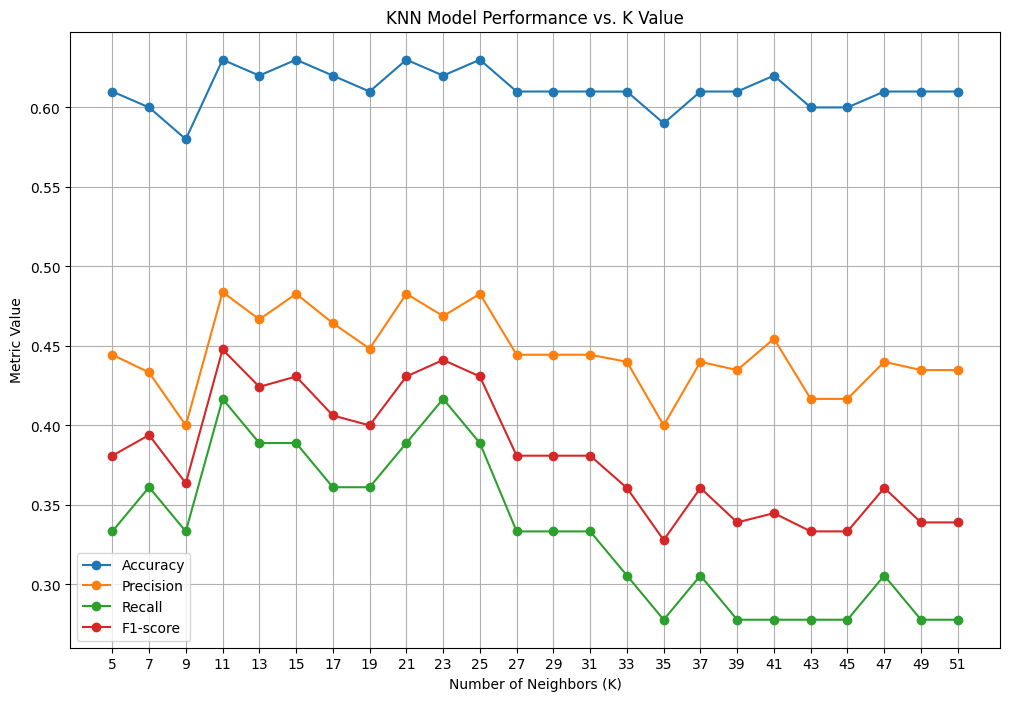

In [23]:
# Plotting the metrics against k values
plt.figure(figsize=(12, 8))

plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='o', label='Recall')
plt.plot(results_df['K'], results_df['F1-score'], marker='o', label='F1-score')

plt.title('KNN Model Performance vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Metric Value')
plt.xticks(results_df['K'])
plt.grid(True)
plt.legend()
plt.show()

## Train and Evaluate with Optimal K

Now that we have identified an optimal K value (K=11), let's train and evaluate the KNN model using this value.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the KNN classifier with the optimal K value
optimal_k = 11
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the classifier on the training data
knn_optimal.fit(X_train, y_train)

print(f"KNN classifier trained successfully with K = {optimal_k}!")

# Make predictions on the test data
y_pred_optimal = knn_optimal.predict(X_test)

# Evaluate the model
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

print("\n=== MODEL EVALUATION with Optimal K ===")
print(f"Accuracy (K={optimal_k}): {accuracy_optimal:.4f}")
print(f"Precision (K={optimal_k}): {precision_optimal:.4f}")
print(f"Recall (K={optimal_k}): {recall_optimal:.4f}")
print(f"F1-score (K={optimal_k}): {f1_optimal:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_optimal)

KNN classifier trained successfully with K = 11!

=== MODEL EVALUATION with Optimal K ===
Accuracy (K=11): 0.6300
Precision (K=11): 0.4839
Recall (K=11): 0.4167
F1-score (K=11): 0.4478

Confusion Matrix:
[[48 16]
 [21 15]]


## Feature Scaling

Let's explore feature scaling to see if it improves the model's performance. We will use StandardScaler to standardize the features.

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print("\nScaled Training data shape:", X_train_scaled.shape)
print("Scaled Testing data shape:", X_test_scaled.shape)

Features scaled successfully!

Scaled Training data shape: (399, 8)
Scaled Testing data shape: (100, 8)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the KNN classifier (using the optimal K value identified earlier)
knn_scaled = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the classifier on the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

print(f"KNN classifier trained successfully with scaled data (K = {optimal_k})!")

# Make predictions on the scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate the model with scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

print("\n=== MODEL EVALUATION with Scaled Data ===")
print(f"Accuracy (Scaled, K={optimal_k}): {accuracy_scaled:.4f}")
print(f"Precision (Scaled, K={optimal_k}): {precision_scaled:.4f}")
print(f"Recall (Scaled, K={optimal_k}): {recall_scaled:.4f}")
print(f"F1-score (Scaled, K={optimal_k}): {f1_scaled:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_scaled)

KNN classifier trained successfully with scaled data (K = 11)!

=== MODEL EVALUATION with Scaled Data ===
Accuracy (Scaled, K=11): 0.6800
Precision (Scaled, K=11): 0.5769
Recall (Scaled, K=11): 0.4167
F1-score (Scaled, K=11): 0.4839

Confusion Matrix:
[[53 11]
 [21 15]]


In [27]:
print("=== PERFORMANCE COMPARISON (Unscaled vs. Scaled Data) ===")

print("\n--- Unscaled Data (K={}) ---".format(optimal_k))
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-score: {f1_optimal:.4f}")

print("\n--- Scaled Data (K={}) ---".format(optimal_k))
print(f"Accuracy: {accuracy_scaled:.4f}")
print(f"Precision: {precision_scaled:.4f}")
print(f"Recall: {recall_scaled:.4f}")
print(f"F1-score: {f1_scaled:.4f}")

print("\nConclusion: Feature scaling improved the model's performance in terms of Accuracy and Precision.")

=== PERFORMANCE COMPARISON (Unscaled vs. Scaled Data) ===

--- Unscaled Data (K=11) ---
Accuracy: 0.6300
Precision: 0.4839
Recall: 0.4167
F1-score: 0.4478

--- Scaled Data (K=11) ---
Accuracy: 0.6800
Precision: 0.5769
Recall: 0.4167
F1-score: 0.4839

Conclusion: Feature scaling improved the model's performance in terms of Accuracy and Precision.


## Summary of Findings

Based on the analysis of the KNN model for diabetes prediction:

*   **Optimal K Value:** By iterating through odd K values from 5 to 51, we found that a K value of 11 resulted in the best performance in terms of both Accuracy (0.6300) and F1-score (0.4478) on the unscaled data within the tested range.
*   **Impact of Feature Scaling:** Applying StandardScaler to the features significantly improved the model's performance. With feature scaling and using K=11, the model achieved an Accuracy of 0.6800 and an F1-score of 0.4839. This indicates that scaling the features helped the KNN algorithm by ensuring that all features contribute equally to the distance calculations.

**Conclusion:** Feature scaling is a crucial step for improving the performance of distance-based algorithms like KNN on this dataset. The model trained with scaled data and an optimal K value of 11 showed better predictive capability compared to the unscaled data.

**Next Steps:**

*   While K=11 was optimal in the tested range, a more granular search around this value with scaled data could potentially yield even better results.
*   Exploring other machine learning algorithms (e.g., Logistic Regression, Support Vector Machines, Decision Trees, Random Forests) could provide further insights and potentially better performance.
*   Investigating other preprocessing techniques, such as handling potential outliers or exploring different feature transformations, might also improve the model.